In [15]:
import numpy as np
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt

def ellipsoidal_variation(phase, M_bh, M_star, inc, R_star, period):
    # time =[1, 2 , 10] * u.day
    # phase = [0, pi, 2pi]
    
    sep = keplers_third_law(M_bh=M_bh, M_star=M_star, period=period)
    
    ev = -np.cos(phase * 2)
    amplitude = M_bh * np.sin(inc) / M_star * (R_star / sep)**3 * np.sin(inc)
    return amplitude.decompose() * ev

def doppler_beaming(phase, period, inc, M_bh, M_star):
    amplitude = 2.8e-3 * np.sin(inc) * (period / (1 * u.day))**(-1/3)*((M_bh + M_star) / u.solMass)**(-2/3) * (M_bh / u.solMass) 
    db = np.sin(phase)
    return amplitude.decompose() * db

def self_lensing():
    # TODO
    raise NotImplementedError


def relative_flux():
    return ellipsoidal_variation() + doppler_beaming() + self_lensing()

In [13]:
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': 0.7 * fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

In [3]:
x_vals = np.linspace(0, 2 * np.pi, 1000)

for M_bh in [5, 10, 8] * u.Msun:
    
    y_vals = ellipsoidal_variation(phase=x_vals, M_bh=M_bh, M_star=600 * u.Msun, inc=np.pi/2, R_star=20 * u.Rsun, sep=6 * u.AU)
    plt.plot(x_vals, y_vals, label=f"M_bh= {M_bh}")

plt.legend()
plt.xlabel("Orbital Phase")
plt.ylabel("Relative Flux")
plt.show()



TypeError: ellipsoidal_variation() got an unexpected keyword argument 'sep'

In [14]:
x_vals = np.linspace(0, 2 * np.pi, 1000)

for R_star in [2, 11, 9] * u.Rsun:
    
    y_vals = ellipsoidal_variation(phase=x_vals, M_bh= 30 * u.Msun, M_star=600 * u.Msun, inc=np.pi/2, R_star=R_star, sep=6 * u.AU)
    plt.plot(x_vals, y_vals, label=f"radius= {R_star}")

plt.legend()
plt.xlabel("Orbital Phase")
plt.ylabel("Relative Flux")
plt.show()



TypeError: ellipsoidal_variation() got an unexpected keyword argument 'sep'

In [ ]:
plt.figure(figsize=(20, 10))
x_vals = np.linspace(0, 2 * np.pi, 1000)
for M_bh in [5, 10] * u.Msun:
    for R_star in [2, 11] * u.Rsun:
        for inc in [1, 1.4]:
            y_vals = ellipsoidal_variation(phase=x_vals, M_bh=M_bh, M_star=10 * u.Msun, inc=inc, R_star=R_star, sep=6 * u.AU)
            plt.plot(x_vals, y_vals, label=f"R*= {R_star}, M_bh = {M_bh}, Inc = {inc}")

plt.legend()
plt.xlabel("Orbital Phase")
plt.ylabel("Relative Flux")
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
x_vals = np.linspace(0, 2 * np.pi, 1000)
# for loop for radius and seperation.
for R_star in [3, 7] * u.Rsun:
    for sep in [10, 20] * u.AU:
        y_vals = ellipsoidal_variation(phase=x_vals, M_bh= 60 * u.Msun, M_star=10 * u.Msun, inc=np.pi/2, R_star=R_star, sep=sep)
        plt.plot(x_vals, y_vals, label=f"R*= {R_star}, Sep = {sep}")

plt.legend()
plt.xlabel("Orbital Phase")
plt.ylabel("Relative Flux")
plt.show()

# Relative flux seems to increase more the smaller the seperation

In [10]:
def keplers_third_law(period, M_bh, M_star):
    sep = (const.G * (M_star + M_bh)*period**2 / (4 * np.pi**2))**(1/3)
    return sep.to(u.AU)

period = 365 * u.day
M_star = 1 * const.M_earth
M_bh = 1 * u.solMass

print(keplers_third_law(M_bh=M_bh, M_star=M_star, period=period))

0.9995320549379735 AU


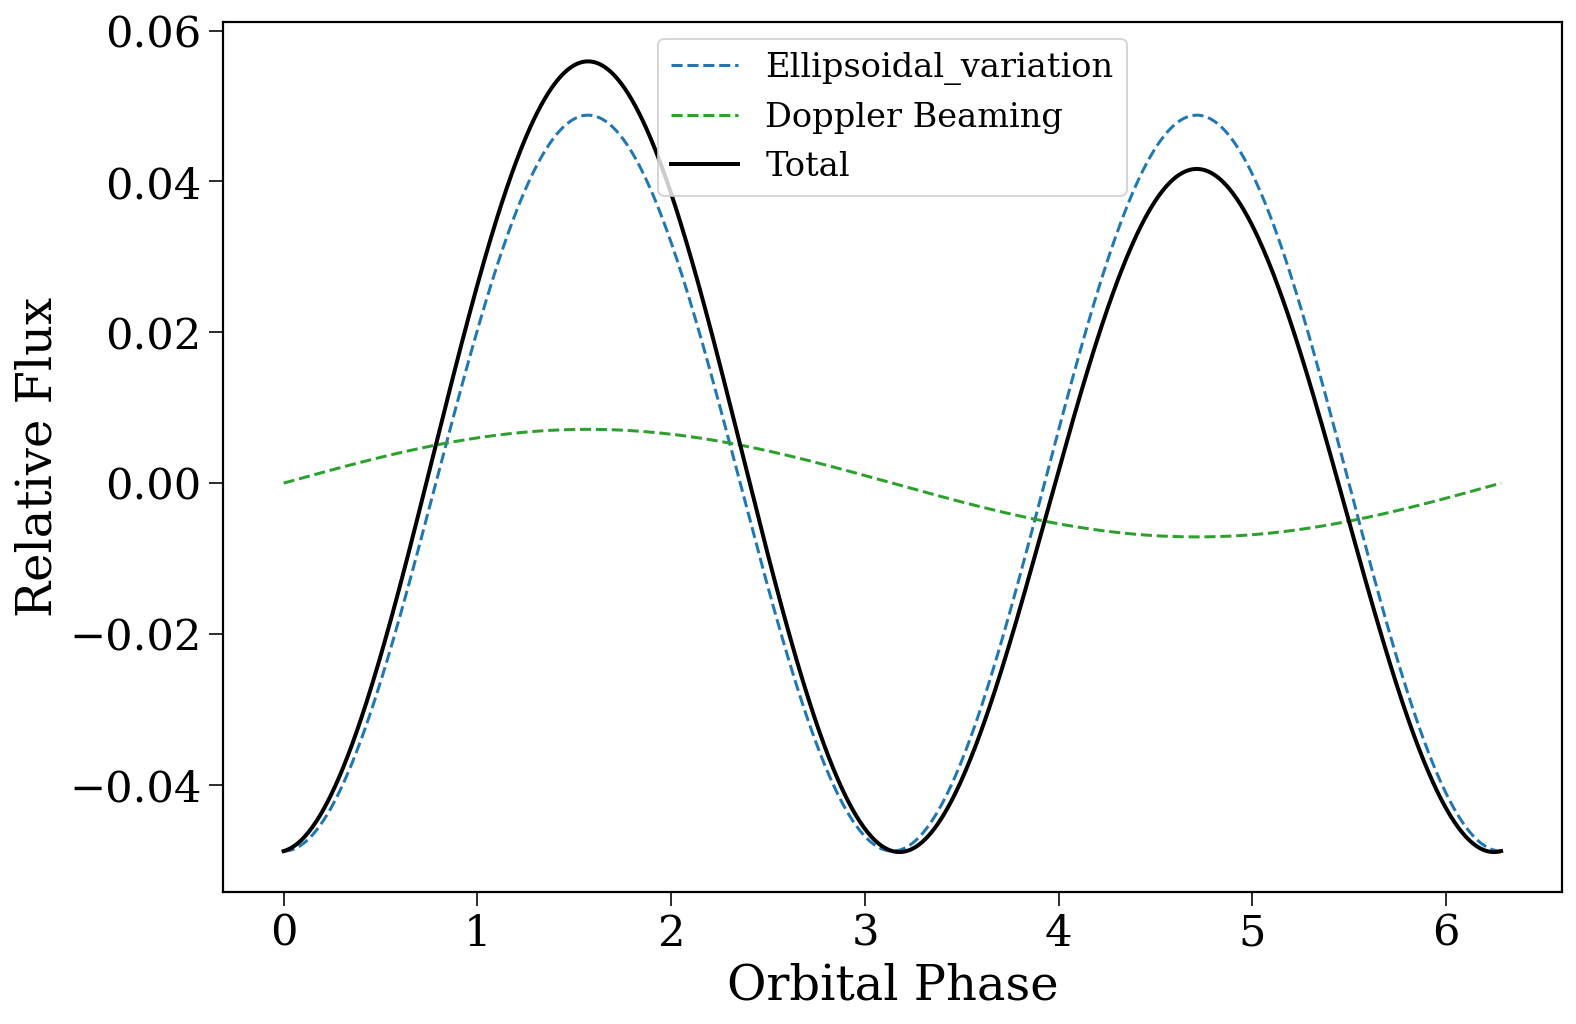

In [12]:
x_vals = np.linspace(0, 2 * np.pi, 1000)

for M_bh in [10] * u.Msun:
    
    ev_vals = ellipsoidal_variation(phase=x_vals, M_bh=M_bh, M_star=1 * u.Msun, inc=np.pi/2, R_star=1 * u.Rsun, period = .5 * u.day)
    plt.plot(x_vals, ev_vals, label="Ellipsoidal_variation", color = 'tab:blue', linestyle ='dashed')
    db_vals = doppler_beaming(phase = x_vals, period = .5 * u.day, inc = np.pi/2, M_bh = M_bh , M_star = 1 * u.solMass)
    plt.plot(x_vals, db_vals, label="Doppler Beaming", color = 'tab:green', linestyle = 'dashed')
    
    plt.plot(x_vals, ev_vals + db_vals, label="Total", color = 'black', linewidth = 2)

plt.legend()
plt.xlabel("Orbital Phase")
plt.ylabel("Relative Flux")
plt.show()

